In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import time

In [3]:
#from tensorflow.keras import models
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
df_input = pd.read_csv("CD3D_one-hot_std", usecols=[1,2,3,4,5,6,7,8] )

In [6]:
df_output = pd. read_csv("CD3D_one-hot", usecols=[9])

In [7]:
df_input.shape #0.45V20℃1.5ms1.6mmと0.65V130℃1.5ms1.6mmのデータなし

(5880000, 8)

In [8]:
df_output.shape

(5880000, 1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.1, random_state=0)

In [10]:
print(x_train.shape,x_test.shape)

(5292000, 8) (588000, 8)


In [11]:
x_train

,x座標,y座標,z座標,V[V],T_cell[℃],W_ch[mm]_0.4,W_ch[mm]_0.8,W_ch[mm]_1.6
5471191,-0.069578,-0.570213,-0.139521,1.257201,1.453669,0,1,0
2868884,-0.194979,0.126826,-0.656985,0.941289,-0.297883,0,0,1
5733272,1.727839,-0.619956,-1.429954,0.625377,1.453669,0,0,1
200929,-0.792724,0.229164,1.567722,0.625377,-1.465584,1,0,0
90277,-0.174079,-0.506846,1.408998,-0.954184,-1.465584,1,0,0
...,...,...,...,...,...,...,...,...
2249467,0.110164,1.520903,1.056710,0.941289,-0.297883,1,0,0
5157699,-0.658963,1.013966,1.150912,1.257201,1.453669,1,0,0
2215104,-1.277609,0.687308,1.110908,1.257201,-0.297883,1,0,0
1484405,0.181225,0.269402,-0.494390,-0.322359,-0.881734,0,1,0


In [12]:
y_train

,i[A/m^2]
5471191,3193.395506
2868884,1833.576864
5733272,5049.719448
200929,2450.012296
90277,14160.899682
...,...
2249467,2664.900433
5157699,3588.543249
2215104,1342.625145
1484405,8230.383981


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import regularizers, initializers

model = Sequential()

weights = [com.get_weights() for com in model.layers[0:]]  

model.add(Dense(units=32, input_shape=(8,), activation='relu'))  
model.add(Dense(units=10, activation='relu'))  
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='linear'))  #隠れ層3層でやってみる

model.compile(loss='mean_absolute_error',    
              optimizer='adam',             #とりあえずadamで
              metrics=['mae'],
              run_eagerly=False)   #計算時間5倍くらいかかる

In [14]:
start_time = time.time()
callbacks1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_mae',
                            factor=0.2,
                            patience=5,
                            mode="auto",
                            min_lr=0.001) #最初は0.001だった
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor="val_mae",
                                              patience=5, #20→5
                                              mode="auto")
history =  model.fit(x=x_train,
                     y=y_train,
                     epochs = 20000,
                     batch_size=200,
                     validation_data=(x_test, y_test),
                     callbacks=[callbacks1,callbacks2])
end_time = time.time()
elapsed_time = end_time - start_time   #経過時間を計算して表示
print(f"計算にかかった時間: {elapsed_time}秒")

Epoch 1/20000
26460/26460 [==============================] - 114s 4ms/step - loss: 657.6004 - mae: 657.6004 - val_loss: 291.0118 - val_mae: 291.0118 - lr: 0.0010
Epoch 2/20000
26460/26460 [==============================] - 104s 4ms/step - loss: 224.8413 - mae: 224.8413 - val_loss: 189.2511 - val_mae: 189.2511 - lr: 0.0010
Epoch 3/20000
26460/26460 [==============================] - 103s 4ms/step - loss: 178.7345 - mae: 178.7345 - val_loss: 171.4428 - val_mae: 171.4428 - lr: 0.0010
Epoch 4/20000
26460/26460 [==============================] - 97s 4ms/step - loss: 169.3211 - mae: 169.3211 - val_loss: 165.3257 - val_mae: 165.3257 - lr: 0.0010
Epoch 5/20000
26460/26460 [==============================] - 93s 4ms/step - loss: 160.7853 - mae: 160.7853 - val_loss: 155.6922 - val_mae: 155.6922 - lr: 0.0010
Epoch 6/20000
26460/26460 [==============================] - 96s 4ms/step - loss: 153.4875 - mae: 153.4875 - val_loss: 149.8104 - val_mae: 149.8104 - lr: 0.0010
Epoch 7/20000
26460/26460 [====

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

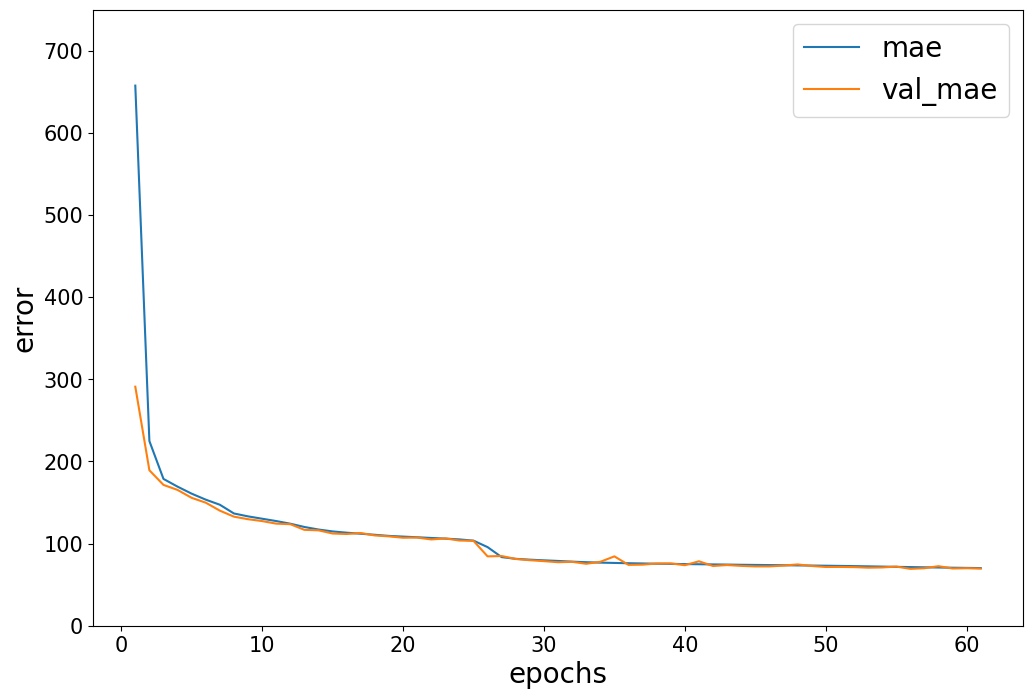

In [16]:
mae = history_dict['mae']
val_mse = history_dict['val_mae']
epochs = range(1, len(mae) + 1)

plt.rcParams["font.size"] = 15
plt.figure(figsize=(12, 8))
plt.plot(epochs, mae, label='mae')
plt.plot(epochs, val_mse, label='val_mae')
plt.xlabel("epochs",fontsize=20)
plt.ylabel("error",fontsize=20)
plt.ylim((0,750))
plt.legend(loc = 'best',fontsize=20)
#plt.savefig('mae_transition.png')
plt.show()

In [17]:
weights = [com.get_weights() for com in model.layers[0:]] 
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[2].set_weights(weights[2])

In [18]:
model.save('i_predict CD_3Ddist_one-hot')

INFO:tensorflow:Assets written to: i_predict CD_3Ddist_one-hot\assets


In [19]:
import tensorflow as tf

# MAPEを計算する関数を定義
def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # ゼロで割ることを避けるための小さな値
    percentage_error = tf.abs((y_true - y_pred) / (tf.maximum(tf.abs(y_true), epsilon)))
    mape = tf.reduce_mean(percentage_error) * 100.0
    return mape

df7 = model.predict(df_input)
# MAPEを計算
df7 = pd.DataFrame(df7)
df8 = pd.concat([pd.DataFrame(df_output),df7], axis=1)

y_true = tf.constant(df8.iloc[:, 0].values, dtype=tf.float32)
y_pred = tf.constant(df8.iloc[:, 1].values, dtype=tf.float32)
mape_value = mean_absolute_percentage_error(y_true,y_pred)

# 結果を表示
print(f"MAPE: {mape_value.numpy()}%")

183750/183750 [==============================] - 396s 2ms/step
MAPE: 1.8146382570266724%
